In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt



In [15]:
# Load the molecular structure and trajectory using MDAnalysis
u = mda.Universe('../../1-sys_prep/box.prmtop', "equ.0.dcd")

# Select the oxygen and ion atoms
oxygen = u.select_atoms("(nucleic or resname G5 C3) and name P")
ions_sod = u.select_atoms("name Na+")

# Set the bin size and maximum distance
bin_size = 0.1
max_distance = 10

# Initialize the total RDF to zero
total_rdf = np.zeros(int(max_distance/bin_size))

# Loop over all frames in the trajectory
for ts in u.trajectory:
    # Calculate the RDF for the current frame and add it to the total
    rdf, edges = np.histogram(mda.lib.distances.distance_array(oxygen.positions,
                                                               ions.positions),
                             bins=np.arange(0, max_distance+bin_size, bin_size),
                             density=True)
    total_rdf += rdf

# Average the total RDF over all frames
avg_rdf = total_rdf / len(u.trajectory)

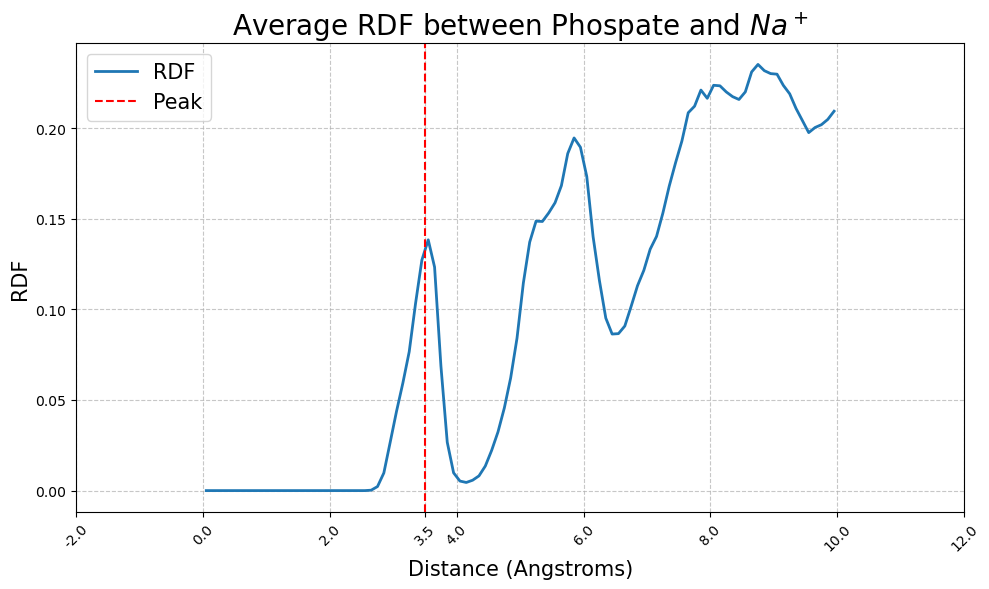

In [24]:
# Find the first peak in the RDF
for i in range(1, len(avg_rdf) - 1):
    if avg_rdf[i] > avg_rdf[i-1] and avg_rdf[i] > avg_rdf[i+1]:
        peak = i
        break

# Plot the RDF and add a vertical line at the first peak
fig, ax = plt.subplots(figsize=(10, 6))
bin_centers = (edges[:-1] + edges[1:]) / 2
ax.plot(bin_centers, avg_rdf, label='RDF', linewidth=2)
ax.axvline(edges[peak], color='red', linestyle='--', label='Peak')


# Add the x value of the first peak to the x ticks
ax.set_xticks(np.append(ax.get_xticks(), edges[peak]))
ax.set_xticklabels(ax.get_xticks(), rotation=45)

# Labels and title
ax.set_xlabel("Distance (Angstroms)", fontsize=15)
ax.set_ylabel("RDF", fontsize=15)
ax.set_title("Average RDF between Phospate and $Na^+$", fontsize=20)

# Legend
ax.legend(fontsize=15)

# Grid and tight layout
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.xlabel("r (Å)")
# plt.ylabel("g(r)")
# plt.title(r"Average RDF between Phospate and $Na^+$")
plt.show()